# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

In [1]:
#All import and url
import cv2
import os
from zipfile import ZipFile
import pickle
import random
import numpy as np
from urllib.request import urlretrieve
from pandas import read_csv
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm
from tensorflow.contrib.layers import flatten
from os import listdir
from os.path import isfile, join
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip'

In [2]:
file = 'traffic-signs-data.zip'
if not os.path.isfile(file):
    print('Downloading ' + file + '...')
    urlretrieve(url, file)
    print('Download Finished')

In [3]:
def unzip(file):
    """
    Uncompress features and labels from a zip file
    :param file: The zip file to extract the data from
    """    
    if(os.path.isfile(file)):
        with ZipFile(file) as zipf:
            zipf.extractall('.')

In [4]:
#unzip('traffic-signs-data.zip')

---
## Step 0: Load The Data

In [4]:
# Load pickled data
# TODO: Fill this in based on where you saved the training and testing data
training_file = './train.p'
validation_file= './valid.p'
testing_file = './test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [5]:
X_train, y_train = shuffle(X_train, y_train)
X_valid, y_valid = shuffle(X_valid, y_valid)
X_test, y_test = shuffle(X_test, y_test)

#X_train, y_train = X_train[:800], y_train[:800]
#X_valid, y_valid = X_valid[:800], y_valid[:800]
#X_test, y_test = X_test[:800], y_test[:800]

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [6]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = np.array(X_train[0]).shape

# TODO: How many unique classes/labels there are in the dataset.
#n_classes = np.size(np.unique(np.array(y_train)))
n_classes = 43

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [7]:
signnames = read_csv('signnames.csv')

In [8]:
ClassId = signnames['ClassId']
SignName = signnames['SignName']
Map_IdName = {i:j for i,j in zip(ClassId,SignName)}

In [10]:
#show all Id and Names
#Map_IdName

In [9]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

# Visualizations will be shown in the notebook.
%matplotlib inline
def show_images_random_selected(images,labels,total_number_of_images,number_image_show=12):
    plt.figure(figsize=(1,1))   
    image_show_index = shuffle(range(total_number_of_images))[:number_image_show]
    f, axarr = plt.subplots((number_image_show-1)//4+1,4)
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.1+0.4*(4), top=0.1+0.5*((number_image_show-1)//4+1),
                        wspace=0.8, hspace=0.4)
    for i in range(number_image_show):
        idx = i%4
        idy = i//4
        axarr[idy,idx].set_title(Map_IdName[labels[image_show_index[i]]]+'({})'.format(labels[image_show_index[i]]))
        axarr[idy,idx].imshow(images[image_show_index[i]])

In [10]:

def show_all_types_of_images(images,labels,total_number_of_images,number_image_show=43):
    plt.figure(figsize=(1,1))
    f, axarr = plt.subplots((number_image_show-1)//4+1,4)
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.1+0.4*(4), top=0.1+0.5*((number_image_show-1)//4+1),
                        wspace=0.8, hspace=0.4)
    for i in range(number_image_show):        
        indexs= np.where(labels==i)[0]
        idx = i%4
        idy = i//4
        axarr[idy,idx].set_title(Map_IdName[i]+'({})'.format(i))
        if len(indexs)>0:
            id = random.choice(indexs)            
            axarr[idy,idx].imshow(images[id])    

Showing All Traffic sign Types ...


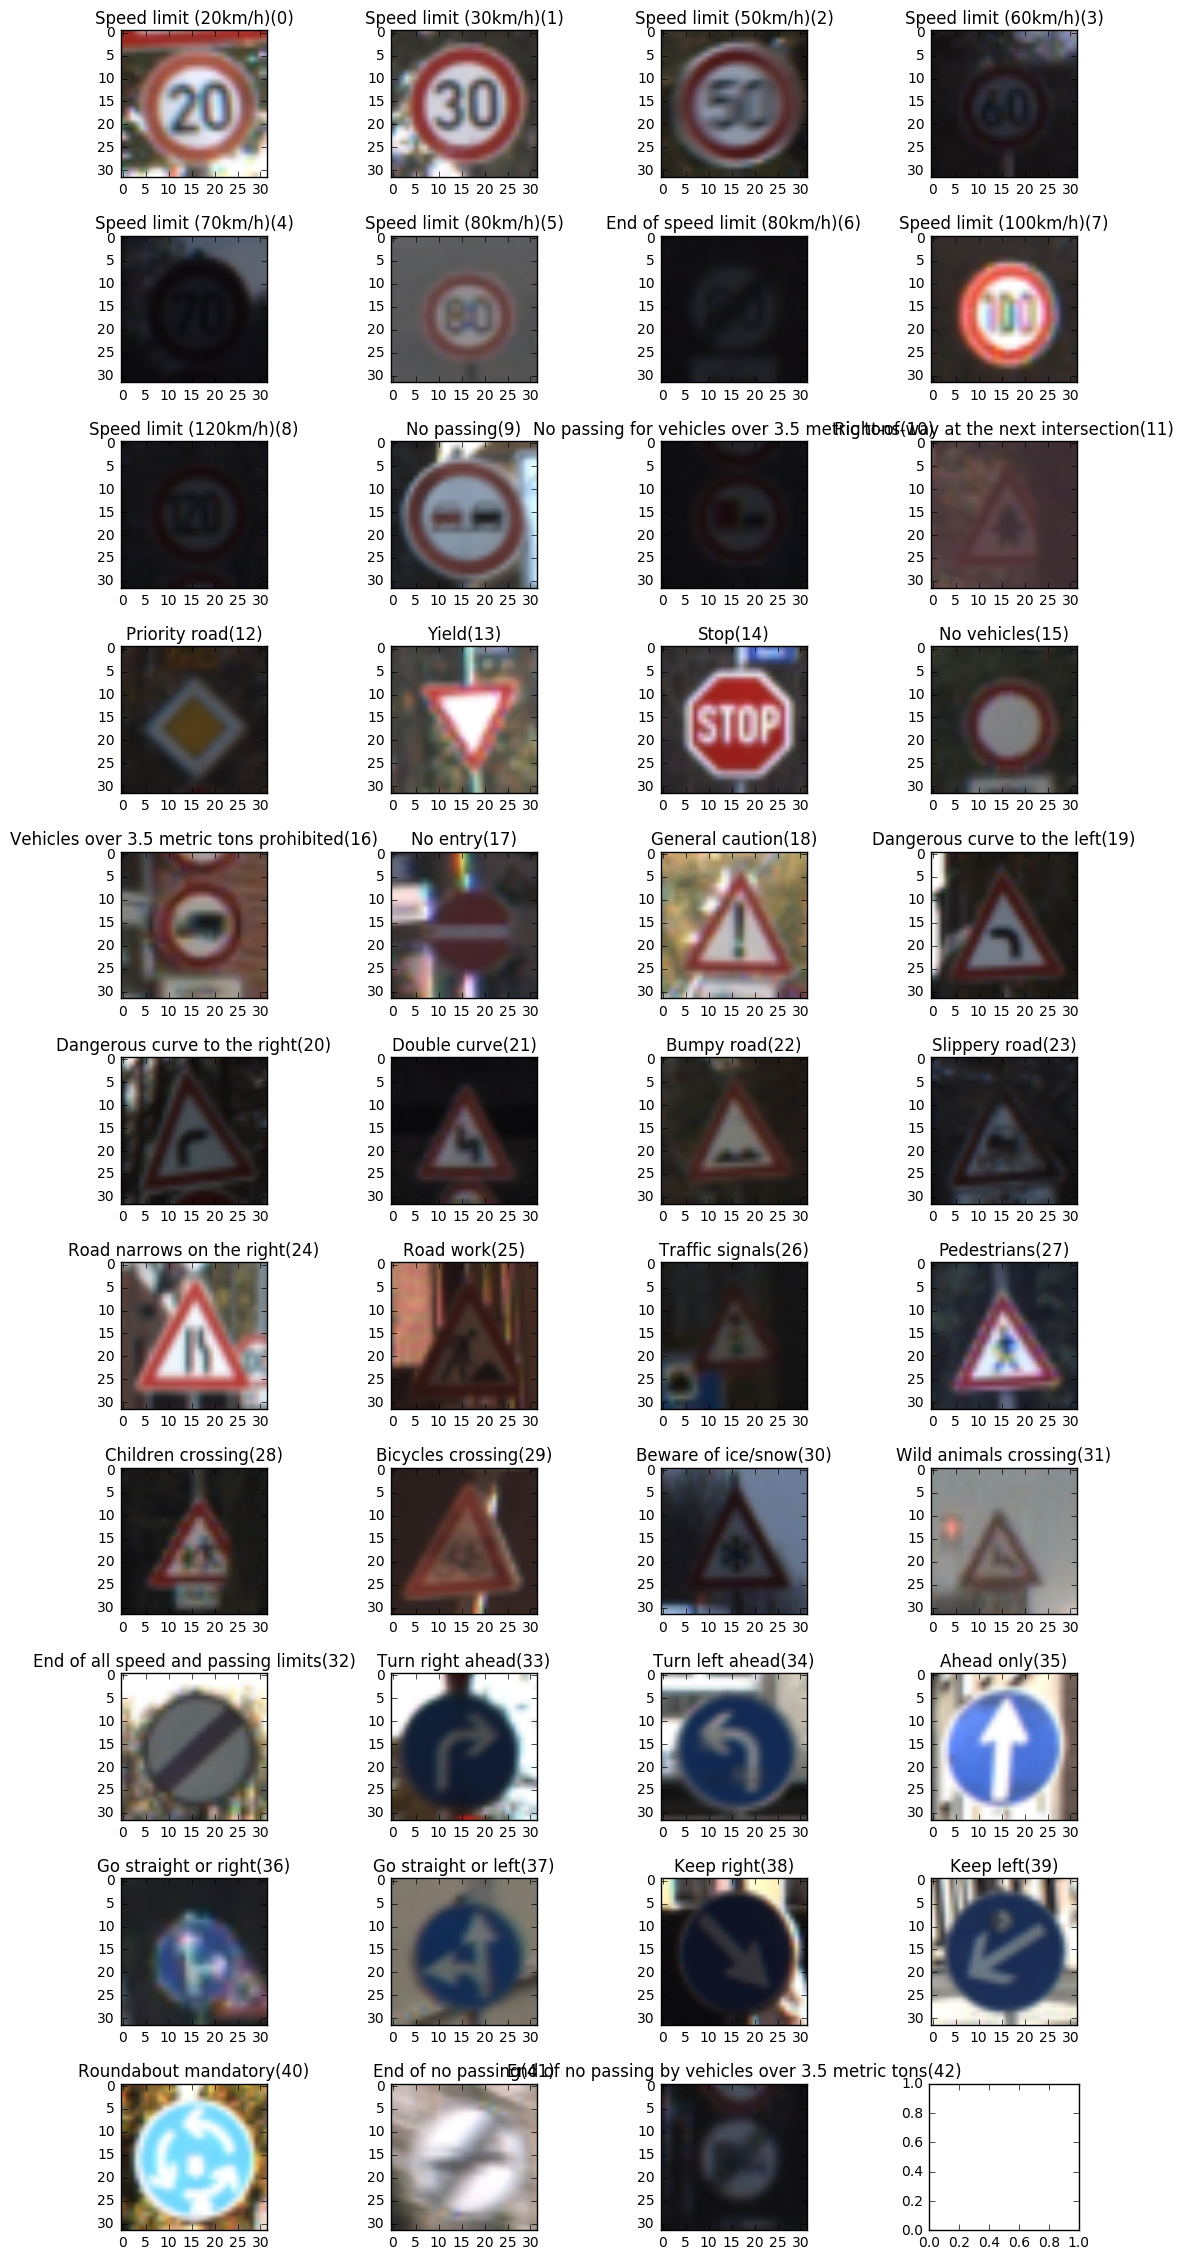

In [13]:
print('Showing All Traffic sign Types ...')
show_all_types_of_images(X_train,y_train,n_train,number_image_show=43)

Showing Training Images ...


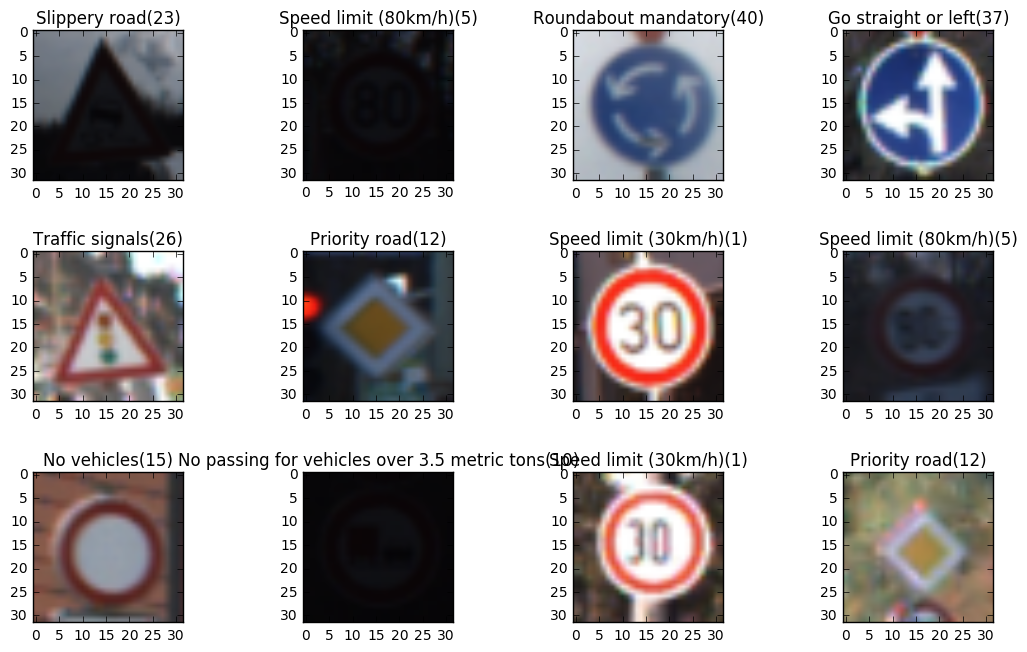

In [14]:
print('Showing Training Images ...')
show_images_random_selected(X_train,y_train,n_train,number_image_show=12)

Showing Test Images ...


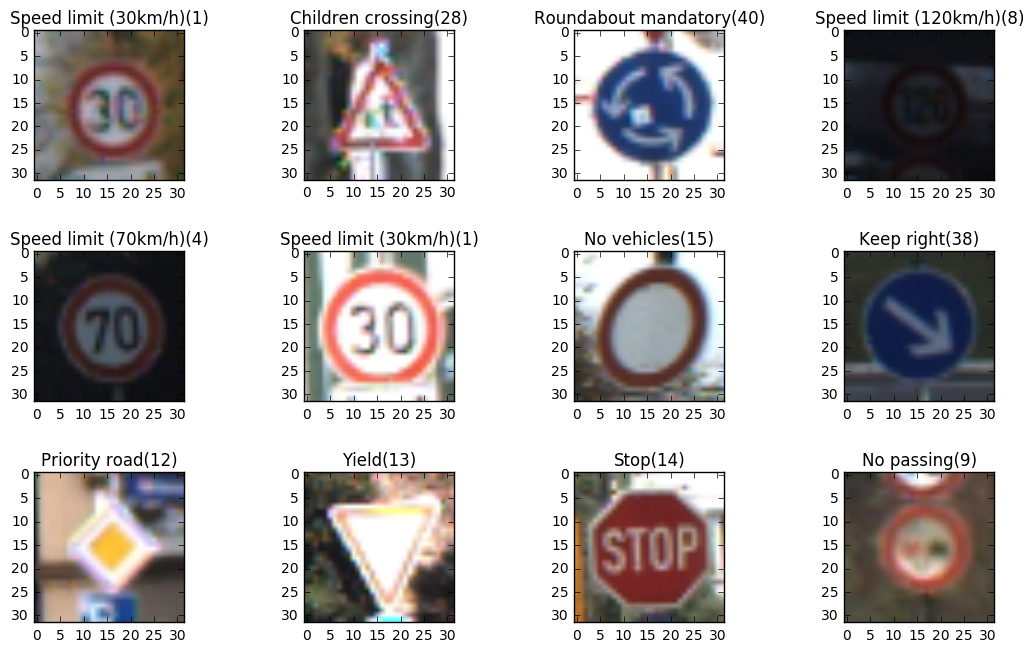

In [ ]:
print('Showing Test Images ...')
show_images_random_selected(X_test,y_test,n_test,number_image_show=12)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

Testing image normalised ...


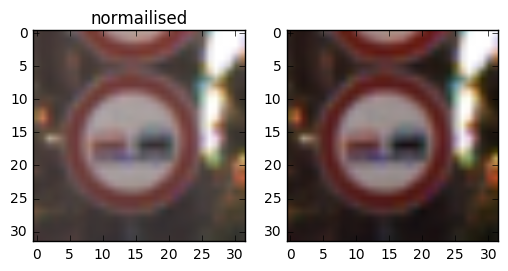

In [11]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.

def normalise_data(image):
    norm_image = np.zeros(image.shape)
    norm_image = cv2.normalize(image,norm_image, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    return norm_image
print('Testing image normalised ...')
index = 100
normalised = normalise_data(X_train[index])
f,axarr = plt.subplots(1,2)
axarr[0].set_title('original')
axarr[0].imshow(X_train[index])
axarr[0].set_title('normailised')
axarr[1].imshow(normalised)

In [12]:
def scale_offset_for_train(image):
    img_mean = np.mean(image)
    img_max = np.max(image)
    img_min = np.min(image)
    img_range = img_max-img_min
    image = (image-img_min)/img_range-0.5
    return image
print('Showing image scale_offset_for_train ...')
soImg = scale_offset_for_train(normalised)
print('min val:',np.min(soImg))
print('max val:',np.max(soImg))

Showing image scale_offset_for_train ...
min val: -0.5
max val: 0.5


In [13]:
def preprocessPipeLine(images):
    length = len(images)
    newImages = []
    for i in range(length):
        newImages.append(scale_offset_for_train(normalise_data(images[i])))
    return newImages

### Preprocessing all data

In [14]:
X_train = preprocessPipeLine(X_train)
X_valid = preprocessPipeLine(X_valid)
X_test = preprocessPipeLine(X_test)

### LogData Management

In [19]:
batches=[]
train_loss=[]
validate_loss=[]
train_accuracy=[]
validate_accuracy=[]

def saveLogData():
    #print('Saving LogData ...')
    saveList(batches,'batches.p')
    saveList(train_loss,'train_loss.p')
    saveList(validate_loss,'validate_loss.p')
    saveList(train_accuracy,'train_accuracy.p')
    saveList(validate_accuracy,'validate_accuracy.p')
    #print('LogData Saved.')

def loadLogData():
    global batches
    global train_loss
    global validate_loss
    global train_accuracy
    global validate_accuracy
    print('Loading LogData ...')
    batches = loadList('batches.p')
    train_loss = loadList('train_loss.p')
    validate_loss = loadList('validate_loss.p')
    train_accuracy = loadList('train_accuracy.p')
    validate_accuracy = loadList('validate_accuracy.p')
    print('LogData Loaded.')

def setLogDataEmpty():
    global batches
    global train_loss
    global validate_loss
    global train_accuracy
    global validate_accuracy
    batches=[]
    train_loss=[]
    validate_loss=[]
    train_accuracy=[]
    validate_accuracy=[]

In [18]:
def saveList(ls,fileName):
    with open(fileName, 'wb') as f:
        pickle.dump(ls, f, pickle.HIGHEST_PROTOCOL)
def loadList(fileName):
    with open(fileName, 'rb') as f:
        ls = pickle.load(f)
    return ls

### Model Architecture

In [39]:
#hyper parameters
learning_rate=0.0003
tf.reset_default_graph()
### Define your architecture here.
### Feel free to use as many code cells as needed.
x = tf.placeholder(shape=[None,32,32,3],dtype=tf.float32)
y = tf.placeholder(shape=[None],dtype=tf.int32)
#def construct_NN_model():
    #LeNet Implementation with slight modification
mu = 0
sigma = 0.1 
 
w_c1 = tf.Variable(tf.truncated_normal([5,5,3,6],mean = mu,stddev = sigma))
b_c1 = tf.Variable(tf.zeros(6))
w_c2 = tf.Variable(tf.truncated_normal([5,5,6,16],mean = mu,stddev = sigma))
b_c2 = tf.Variable(tf.zeros(16))
w_f1 = tf.Variable(tf.truncated_normal([400,120],mean = mu,stddev = sigma))
b_f1 = tf.Variable(tf.zeros(120))
w_f2 = tf.Variable(tf.truncated_normal([120,84],mean = mu,stddev = sigma))
b_f2 = tf.Variable(tf.zeros(84))
w_f3 = tf.Variable(tf.truncated_normal([84,n_classes],mean = mu,stddev = sigma))
b_f3 = tf.Variable(tf.zeros(n_classes))
ksize = [1, 2, 2, 1]
padding = 'VALID'
cnv1 = tf.nn.bias_add(tf.nn.conv2d(x, w_c1, strides=[1, 1, 1, 1], padding=padding),b_c1)
relu1 = tf.nn.relu(cnv1)
pooling1 = tf.nn.max_pool(relu1, ksize, [1, 2, 2, 1], padding)    
cnv2 = tf.nn.bias_add(tf.nn.conv2d(pooling1, w_c2, strides=[1, 1, 1, 1], padding=padding),b_c2)
relu2 = tf.nn.relu(cnv2)
pooling2 = tf.nn.max_pool(relu2, ksize, [1, 2, 2, 1], padding)    
fc0 = flatten(pooling2)
fc1 = tf.add(tf.matmul(fc0,w_f1),b_f1)
#adding dropout
fc1 = tf.nn.dropout(fc1,0.5)
fc1 = tf.nn.relu(fc1)
fc2 = tf.add(tf.matmul(fc1,w_f2),b_f2)
#adding dropout
fc2 = tf.nn.dropout(fc2,0.5)
fc2 = tf.nn.relu(fc2)
logits = tf.add(tf.matmul(fc2,w_f3),b_f3)
#softmax probability
softmax = tf.nn.softmax(logits)
y_one_hot = tf.one_hot(y,n_classes)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits = logits,labels = y_one_hot)
loss = tf.reduce_mean(cross_entropy)

accuracy_input = tf.equal(tf.argmax(logits,1),tf.argmax(y_one_hot,1))
accuracy = tf.reduce_mean(tf.cast(accuracy_input, tf.float32))

optimizer = tf.train.AdamOptimizer(learning_rate)
training = optimizer.minimize(loss)

init = tf.global_variables_initializer()
#   return logits,loss,training
saver = tf.train.Saver()

def evaluate(X,Y,sess,loss,accuracy,softmax):
    _loss = sess.run(loss,feed_dict={x:X,y:Y})
    _accuracy = sess.run(accuracy,feed_dict={x:X,y:Y})
    _softmax = sess.run(softmax,feed_dict={x:X,y:Y})
    return _loss,_accuracy,_softmax

In [40]:
def trainModel(bloadModel=False,bloadLogData = False,epoches = 5,batch_size = 128):
    with tf.Session() as sess:
        print('Begin training ...')
        if(bloadLogData):
            loadLogData()
        else:
            setLogDataEmpty()
        if(bloadModel):
            saver.restore(sess,'./lenet')
        else:
            sess.run(init)
    #    sess.run(init)
    #    ckpt = tf.train.get_checkpoint_state("./lenet")
    #    if ckpt and ckpt.model_checkpoint_path:
    #        # Restores from checkpoint
    #        saver.restore(sess, "./lenet")
    #        print("Model loaded")
    #    else:
    #        print("No checkpoint file found")
     #   saver.restore(sess,tf.train.latest_checkpoint('.'))
        for epoch_i in range(epoches):
            # Progress bar
            batches_pbar = tqdm(range(0,n_train,batch_size), desc='Epoch {:>2}/{}'.format(epoch_i+1, epoches), unit='batches')
            for offset in batches_pbar:         
                sess.run(training,feed_dict={x:X_train[offset:offset+batch_size],y:y_train[offset:offset+batch_size]})
                #validate accuracy
                b_validate_loss,b_validate_accuracy,b_softmax = evaluate(feed_dict_validate['x'],feed_dict_validate['y'],sess,loss,accuracy,softmax)
                b_train_loss,b_train_accuracy,b_softmax = evaluate(feed_dict_train['x'],feed_dict_train['y'],sess,loss,accuracy,softmax)
                #log accuracy
                train_loss.append(b_train_loss)
                train_accuracy.append(b_train_accuracy)
                validate_loss.append(b_validate_loss)
                validate_accuracy.append(b_validate_accuracy)     
                batch_count = batches[-1] if batches else 0
                batches.append(batch_size+batch_count)                
                saver.save(sess, './lenet')
                saveLogData()
                print('train loss:{}    train accuracy:{}'.format(b_train_loss,b_train_accuracy))
                print('validate loss:{}    validate accuracy:{}'.format(b_validate_loss,b_validate_accuracy))
            print('Evaluate on validation set ...')  
            b_validate_loss,b_validate_accuracy,b_softmax = evaluate(feed_dict_validate['x'],feed_dict_validate['y'],sess,loss,accuracy,softmax)
            print('Validation loss:',b_validate_loss)
            print('Validation accuracy:',b_validate_accuracy)
            saver.save(sess, './lenet')
            saveLogData()
    print('Training done!')    

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [41]:
#re shuffle
X_train,y_train = shuffle(X_train,y_train)
feed_dict_train = {'x':X_train,'y':y_train}
feed_dict_validate = {'x':X_valid,'y':y_valid}
feed_dict_test = {'x':X_test,'y':y_test}

In [42]:
### Train your model here.

In [43]:
epoches = 1
batch_size = 256

In [44]:
trainModel(bloadModel=True,bloadLogData = True,epoches =epoches,batch_size=batch_size)

Epoch  1/1:   0%|          | 0/136 [00:00<?, ?batches/s]

Begin training ...
Loading LogData ...
LogData Loaded.


Epoch  1/1:   1%|          | 1/136 [00:03<07:13,  3.21s/batches]

train loss:0.35903650522232056    train accuracy:0.8868927359580994
validate loss:0.6041787266731262    validate accuracy:0.844217836856842


Epoch  1/1:   1%|▏         | 2/136 [00:06<07:09,  3.20s/batches]

train loss:0.3692713975906372    train accuracy:0.889536440372467
validate loss:0.5679948925971985    validate accuracy:0.8405898213386536


Epoch  1/1:   2%|▏         | 3/136 [00:09<07:05,  3.20s/batches]

train loss:0.3624650239944458    train accuracy:0.8916630744934082
validate loss:0.6232725977897644    validate accuracy:0.8421770334243774


Epoch  1/1:   3%|▎         | 4/136 [00:12<07:02,  3.20s/batches]

train loss:0.35246050357818604    train accuracy:0.8870938420295715
validate loss:0.6075161099433899    validate accuracy:0.8451249003410339


Epoch  1/1:   4%|▎         | 5/136 [00:15<06:59,  3.20s/batches]

train loss:0.36668965220451355    train accuracy:0.8874099254608154
validate loss:0.5787646770477295    validate accuracy:0.8394559621810913


Epoch  1/1:   4%|▍         | 6/136 [00:19<06:55,  3.20s/batches]

train loss:0.36697670817375183    train accuracy:0.8868926763534546
validate loss:0.6084324717521667    validate accuracy:0.8405898213386536


Epoch  1/1:   5%|▌         | 7/136 [00:22<06:52,  3.20s/batches]

train loss:0.3695259094238281    train accuracy:0.8865765929222107
validate loss:0.6061603426933289    validate accuracy:0.8424038290977478


Epoch  1/1:   6%|▌         | 8/136 [00:25<06:49,  3.20s/batches]

train loss:0.36715346574783325    train accuracy:0.8870364427566528
validate loss:0.5865340232849121    validate accuracy:0.8421770930290222


Epoch  1/1:   7%|▋         | 9/136 [00:28<06:46,  3.20s/batches]

train loss:0.365360289812088    train accuracy:0.8875824213027954
validate loss:0.607176661491394    validate accuracy:0.8374152183532715


Epoch  1/1:   7%|▋         | 10/136 [00:31<06:41,  3.19s/batches]

train loss:0.3552984297275543    train accuracy:0.8879559636116028
validate loss:0.5697416663169861    validate accuracy:0.843991219997406


Epoch  1/1:   8%|▊         | 11/136 [00:35<06:39,  3.19s/batches]

train loss:0.3745918571949005    train accuracy:0.8887606263160706
validate loss:0.5901180505752563    validate accuracy:0.8401362895965576


Epoch  1/1:   9%|▉         | 12/136 [00:38<06:32,  3.16s/batches]

train loss:0.3626669645309448    train accuracy:0.8883582353591919
validate loss:0.6046043634414673    validate accuracy:0.8337870836257935


Epoch  1/1:  10%|▉         | 13/136 [00:41<06:26,  3.15s/batches]

train loss:0.3728283941745758    train accuracy:0.888042151927948
validate loss:0.590944766998291    validate accuracy:0.8369616270065308


Epoch  1/1:  10%|█         | 14/136 [00:44<06:21,  3.13s/batches]

train loss:0.37460172176361084    train accuracy:0.887955904006958
validate loss:0.5874277949333191    validate accuracy:0.8344672918319702


Epoch  1/1:  11%|█         | 15/136 [00:47<06:20,  3.15s/batches]

train loss:0.36266839504241943    train accuracy:0.8856857419013977
validate loss:0.5967778563499451    validate accuracy:0.8467122316360474


Epoch  1/1:  12%|█▏        | 16/136 [00:50<06:19,  3.16s/batches]

train loss:0.36757218837738037    train accuracy:0.8892490267753601
validate loss:0.5869006514549255    validate accuracy:0.830839216709137


Epoch  1/1:  12%|█▎        | 17/136 [00:54<06:17,  3.17s/batches]

train loss:0.36519068479537964    train accuracy:0.8875536918640137
validate loss:0.5870380997657776    validate accuracy:0.8410432934761047


Epoch  1/1:  13%|█▎        | 18/136 [00:57<06:15,  3.18s/batches]

train loss:0.35953617095947266    train accuracy:0.8889904022216797
validate loss:0.6007359623908997    validate accuracy:0.8471658229827881


Epoch  1/1:  14%|█▍        | 19/136 [01:00<06:10,  3.16s/batches]

train loss:0.3581584095954895    train accuracy:0.8883582949638367
validate loss:0.6024287939071655    validate accuracy:0.8358278870582581


Epoch  1/1:  15%|█▍        | 20/136 [01:03<06:02,  3.12s/batches]

train loss:0.3659612536430359    train accuracy:0.8891341686248779
validate loss:0.6078940629959106    validate accuracy:0.8430840969085693


Epoch  1/1:  15%|█▌        | 21/136 [01:06<05:56,  3.10s/batches]

train loss:0.3593326508998871    train accuracy:0.8887892961502075
validate loss:0.5780590772628784    validate accuracy:0.8523812294006348


Epoch  1/1:  16%|█▌        | 22/136 [01:09<05:50,  3.07s/batches]

train loss:0.3563750982284546    train accuracy:0.8908295631408691
validate loss:0.600141704082489    validate accuracy:0.8433108329772949


Epoch  1/1:  17%|█▋        | 23/136 [01:12<05:49,  3.09s/batches]

train loss:0.3589511513710022    train accuracy:0.8891916275024414
validate loss:0.5996345281600952    validate accuracy:0.8399094343185425


Epoch  1/1:  18%|█▊        | 24/136 [01:15<05:44,  3.07s/batches]

train loss:0.36044761538505554    train accuracy:0.8893927931785583
validate loss:0.5785706639289856    validate accuracy:0.8478460311889648


Epoch  1/1:  18%|█▊        | 25/136 [01:18<05:39,  3.06s/batches]

train loss:0.36917728185653687    train accuracy:0.8886456489562988
validate loss:0.5537564754486084    validate accuracy:0.8342405557632446


Epoch  1/1:  19%|█▉        | 26/136 [01:21<05:38,  3.08s/batches]

train loss:0.36441338062286377    train accuracy:0.8870938420295715
validate loss:0.6058337688446045    validate accuracy:0.8512474298477173


Epoch  1/1:  20%|█▉        | 27/136 [01:24<05:38,  3.10s/batches]

train loss:0.3609730899333954    train accuracy:0.8924676179885864
validate loss:0.6038822531700134    validate accuracy:0.8448982238769531


Epoch  1/1:  21%|██        | 28/136 [01:28<05:36,  3.11s/batches]

train loss:0.3618343472480774    train accuracy:0.8889617919921875
validate loss:0.587178111076355    validate accuracy:0.8451249599456787


Epoch  1/1:  21%|██▏       | 29/136 [01:31<05:33,  3.11s/batches]

train loss:0.36155450344085693    train accuracy:0.8892491459846497
validate loss:0.6110271215438843    validate accuracy:0.840363085269928


Epoch  1/1:  22%|██▏       | 30/136 [01:34<05:31,  3.13s/batches]

train loss:0.3545938730239868    train accuracy:0.8887892961502075
validate loss:0.5913734436035156    validate accuracy:0.844217836856842


Epoch  1/1:  23%|██▎       | 31/136 [01:37<05:28,  3.13s/batches]

train loss:0.36652758717536926    train accuracy:0.8897088766098022
validate loss:0.5997300148010254    validate accuracy:0.839909553527832


Epoch  1/1:  24%|██▎       | 32/136 [01:40<05:25,  3.13s/batches]

train loss:0.3661227524280548    train accuracy:0.8885019421577454
validate loss:0.6070627570152283    validate accuracy:0.8401362895965576


Epoch  1/1:  24%|██▍       | 33/136 [01:43<05:21,  3.12s/batches]

train loss:0.35755690932273865    train accuracy:0.886519193649292
validate loss:0.5936928987503052    validate accuracy:0.8428573608398438


Epoch  1/1:  25%|██▌       | 34/136 [01:46<05:15,  3.09s/batches]

train loss:0.3549775183200836    train accuracy:0.889536440372467
validate loss:0.6214079856872559    validate accuracy:0.8383221626281738


Epoch  1/1:  26%|██▌       | 35/136 [01:49<05:14,  3.11s/batches]

train loss:0.36251384019851685    train accuracy:0.890628457069397
validate loss:0.6031878590583801    validate accuracy:0.8428573608398438


Epoch  1/1:  26%|██▋       | 36/136 [01:52<05:11,  3.11s/batches]

train loss:0.3537590801715851    train accuracy:0.8898239135742188
validate loss:0.5910999774932861    validate accuracy:0.8421770930290222


Epoch  1/1:  27%|██▋       | 37/136 [01:56<05:05,  3.09s/batches]

train loss:0.36256200075149536    train accuracy:0.8899100422859192
validate loss:0.6066274642944336    validate accuracy:0.8351476192474365


Epoch  1/1:  28%|██▊       | 38/136 [01:59<05:03,  3.09s/batches]

train loss:0.3569889962673187    train accuracy:0.8910882472991943
validate loss:0.5559614896774292    validate accuracy:0.8428573608398438


Epoch  1/1:  29%|██▊       | 39/136 [02:02<05:01,  3.11s/batches]

train loss:0.35359740257263184    train accuracy:0.8884731531143188
validate loss:0.5705729126930237    validate accuracy:0.8392292261123657


Epoch  1/1:  29%|██▉       | 40/136 [02:05<04:59,  3.12s/batches]

train loss:0.35807302594184875    train accuracy:0.8893927931785583
validate loss:0.5988353490829468    validate accuracy:0.8437644243240356


Epoch  1/1:  30%|███       | 41/136 [02:08<04:56,  3.12s/batches]

train loss:0.3565962314605713    train accuracy:0.8893353939056396
validate loss:0.5878337621688843    validate accuracy:0.8437644243240356


Epoch  1/1:  31%|███       | 42/136 [02:11<04:54,  3.14s/batches]

train loss:0.36517855525016785    train accuracy:0.8859730958938599
validate loss:0.542226254940033    validate accuracy:0.8408164978027344


Epoch  1/1:  32%|███▏      | 43/136 [02:14<04:53,  3.16s/batches]

train loss:0.35892054438591003    train accuracy:0.8898813128471375
validate loss:0.5871515274047852    validate accuracy:0.8430840969085693


Epoch  1/1:  32%|███▏      | 44/136 [02:18<04:50,  3.16s/batches]

train loss:0.35467612743377686    train accuracy:0.8901973962783813
validate loss:0.6105219721794128    validate accuracy:0.8444446325302124


Epoch  1/1:  33%|███▎      | 45/136 [02:21<04:44,  3.13s/batches]

train loss:0.3578328490257263    train accuracy:0.8911457657814026
validate loss:0.6271841526031494    validate accuracy:0.8419502973556519


Epoch  1/1:  34%|███▍      | 46/136 [02:24<04:40,  3.12s/batches]

train loss:0.3641636371612549    train accuracy:0.8893066048622131
validate loss:0.6017702221870422    validate accuracy:0.8403629660606384


Epoch  1/1:  35%|███▍      | 47/136 [02:27<04:38,  3.13s/batches]

train loss:0.36361128091812134    train accuracy:0.8906285166740417
validate loss:0.559825599193573    validate accuracy:0.8458051681518555


Epoch  1/1:  35%|███▌      | 48/136 [02:30<04:34,  3.12s/batches]

train loss:0.36722055077552795    train accuracy:0.8892204165458679
validate loss:0.5860111117362976    validate accuracy:0.8376418948173523


Epoch  1/1:  36%|███▌      | 49/136 [02:33<04:33,  3.14s/batches]

train loss:0.3606145977973938    train accuracy:0.8897088766098022
validate loss:0.5684325098991394    validate accuracy:0.8426305651664734


Epoch  1/1:  37%|███▋      | 50/136 [02:36<04:31,  3.16s/batches]

train loss:0.3545289635658264    train accuracy:0.8901686072349548
validate loss:0.6039682030677795    validate accuracy:0.8362813591957092


Epoch  1/1:  38%|███▊      | 51/136 [02:40<04:29,  3.17s/batches]

train loss:0.3579043447971344    train accuracy:0.8893927931785583
validate loss:0.5940338373184204    validate accuracy:0.8482995629310608


Epoch  1/1:  38%|███▊      | 52/136 [02:43<04:26,  3.17s/batches]

train loss:0.3488490581512451    train accuracy:0.8878985047340393
validate loss:0.6128144264221191    validate accuracy:0.8448981642723083


Epoch  1/1:  39%|███▉      | 53/136 [02:46<04:23,  3.18s/batches]

train loss:0.356847882270813    train accuracy:0.8910020589828491
validate loss:0.6009093523025513    validate accuracy:0.8480727076530457


Epoch  1/1:  40%|███▉      | 54/136 [02:49<04:20,  3.18s/batches]

train loss:0.3528852164745331    train accuracy:0.889019250869751
validate loss:0.6001889109611511    validate accuracy:0.839229166507721


Epoch  1/1:  40%|████      | 55/136 [02:52<04:17,  3.18s/batches]

train loss:0.3644104301929474    train accuracy:0.8903985023498535
validate loss:0.608583390712738    validate accuracy:0.8383221626281738


Epoch  1/1:  41%|████      | 56/136 [02:55<04:14,  3.19s/batches]

train loss:0.35115480422973633    train accuracy:0.8901111483573914
validate loss:0.5602346658706665    validate accuracy:0.8408164978027344


Epoch  1/1:  42%|████▏     | 57/136 [02:59<04:12,  3.19s/batches]

train loss:0.3605774939060211    train accuracy:0.8907721042633057
validate loss:0.5462795495986938    validate accuracy:0.8471657633781433


Epoch  1/1:  43%|████▎     | 58/136 [03:02<04:09,  3.19s/batches]

train loss:0.3576759696006775    train accuracy:0.889651358127594
validate loss:0.6022641658782959    validate accuracy:0.8458052277565002


Epoch  1/1:  43%|████▎     | 59/136 [03:05<04:05,  3.19s/batches]

train loss:0.35780203342437744    train accuracy:0.8895077109336853
validate loss:0.6021079421043396    validate accuracy:0.8489798307418823


Epoch  1/1:  44%|████▍     | 60/136 [03:08<04:02,  3.20s/batches]

train loss:0.3486393988132477    train accuracy:0.887927234172821
validate loss:0.6006812453269958    validate accuracy:0.8426305651664734


Epoch  1/1:  45%|████▍     | 61/136 [03:11<03:59,  3.20s/batches]

train loss:0.35375726222991943    train accuracy:0.8891054391860962
validate loss:0.5644232034683228    validate accuracy:0.8433108925819397


Epoch  1/1:  46%|████▌     | 62/136 [03:15<03:56,  3.20s/batches]

train loss:0.3658314347267151    train accuracy:0.8893066048622131
validate loss:0.6104995608329773    validate accuracy:0.8430840969085693


Epoch  1/1:  46%|████▋     | 63/136 [03:18<03:53,  3.19s/batches]

train loss:0.3507672846317291    train accuracy:0.8917779326438904
validate loss:0.6056405305862427    validate accuracy:0.844217836856842


Epoch  1/1:  47%|████▋     | 64/136 [03:21<03:50,  3.20s/batches]

train loss:0.34805354475975037    train accuracy:0.8901973962783813
validate loss:0.591126024723053    validate accuracy:0.8424038290977478


Epoch  1/1:  48%|████▊     | 65/136 [03:24<03:46,  3.20s/batches]

train loss:0.3539363145828247    train accuracy:0.8884157538414001
validate loss:0.5910090208053589    validate accuracy:0.84104323387146


Epoch  1/1:  49%|████▊     | 66/136 [03:27<03:43,  3.20s/batches]

train loss:0.35257965326309204    train accuracy:0.8914617896080017
validate loss:0.5578968524932861    validate accuracy:0.8451249599456787


Epoch  1/1:  49%|████▉     | 67/136 [03:31<03:40,  3.20s/batches]

train loss:0.3689000606536865    train accuracy:0.8895938992500305
validate loss:0.5890952348709106    validate accuracy:0.8394560217857361


Epoch  1/1:  50%|█████     | 68/136 [03:34<03:33,  3.15s/batches]

train loss:0.34715762734413147    train accuracy:0.8905709981918335
validate loss:0.5831111073493958    validate accuracy:0.8426305651664734


Epoch  1/1:  51%|█████     | 69/136 [03:37<03:28,  3.11s/batches]

train loss:0.3543105125427246    train accuracy:0.8920940160751343
validate loss:0.5990013480186462    validate accuracy:0.8428573608398438


Epoch  1/1:  51%|█████▏    | 70/136 [03:40<03:25,  3.11s/batches]

train loss:0.35945427417755127    train accuracy:0.8914905190467834
validate loss:0.594362199306488    validate accuracy:0.8385488986968994


Epoch  1/1:  52%|█████▏    | 71/136 [03:43<03:21,  3.10s/batches]

train loss:0.35109400749206543    train accuracy:0.8919215798377991
validate loss:0.5733222961425781    validate accuracy:0.8424038290977478


Epoch  1/1:  53%|█████▎    | 72/136 [03:46<03:19,  3.12s/batches]

train loss:0.36172863841056824    train accuracy:0.8893927931785583
validate loss:0.5931254029273987    validate accuracy:0.8394559621810913


Epoch  1/1:  54%|█████▎    | 73/136 [03:49<03:16,  3.11s/batches]

train loss:0.356458842754364    train accuracy:0.8892491459846497
validate loss:0.5613386631011963    validate accuracy:0.8426305651664734


Epoch  1/1:  54%|█████▍    | 74/136 [03:52<03:11,  3.08s/batches]

train loss:0.35091719031333923    train accuracy:0.8924100995063782
validate loss:0.6176666617393494    validate accuracy:0.8410432934761047


Epoch  1/1:  55%|█████▌    | 75/136 [03:55<03:06,  3.06s/batches]

train loss:0.3606691360473633    train accuracy:0.8880708813667297
validate loss:0.6280220746994019    validate accuracy:0.84104323387146


Epoch  1/1:  56%|█████▌    | 76/136 [03:58<03:02,  3.04s/batches]

train loss:0.35768213868141174    train accuracy:0.888818085193634
validate loss:0.5865322947502136    validate accuracy:0.8385489583015442


Epoch  1/1:  57%|█████▋    | 77/136 [04:01<02:58,  3.03s/batches]

train loss:0.3521348834037781    train accuracy:0.8923814296722412
validate loss:0.5949959754943848    validate accuracy:0.8408165574073792


Epoch  1/1:  57%|█████▋    | 78/136 [04:04<02:55,  3.02s/batches]

train loss:0.351137638092041    train accuracy:0.8907721042633057
validate loss:0.6106678247451782    validate accuracy:0.8392292857170105


Epoch  1/1:  58%|█████▊    | 79/136 [04:07<02:54,  3.05s/batches]

train loss:0.359152227640152    train accuracy:0.891318142414093
validate loss:0.570805549621582    validate accuracy:0.8424038887023926


Epoch  1/1:  59%|█████▉    | 80/136 [04:10<02:52,  3.09s/batches]

train loss:0.3568284213542938    train accuracy:0.8930423259735107
validate loss:0.563722550868988    validate accuracy:0.8485262989997864


Epoch  1/1:  60%|█████▉    | 81/136 [04:14<02:51,  3.12s/batches]

train loss:0.3586466908454895    train accuracy:0.8898525834083557
validate loss:0.5761792659759521    validate accuracy:0.8467122316360474


Epoch  1/1:  60%|██████    | 82/136 [04:17<02:49,  3.15s/batches]

train loss:0.3565046191215515    train accuracy:0.8893640041351318
validate loss:0.6028319001197815    validate accuracy:0.8453516960144043


Epoch  1/1:  61%|██████    | 83/136 [04:20<02:47,  3.16s/batches]

train loss:0.35405468940734863    train accuracy:0.890714704990387
validate loss:0.5722427368164062    validate accuracy:0.8471657037734985


Epoch  1/1:  62%|██████▏   | 84/136 [04:23<02:45,  3.17s/batches]

train loss:0.35892966389656067    train accuracy:0.8899962902069092
validate loss:0.5666385889053345    validate accuracy:0.8430840969085693


Epoch  1/1:  62%|██████▎   | 85/136 [04:26<02:41,  3.17s/batches]

train loss:0.350615531206131    train accuracy:0.8924963474273682
validate loss:0.6085487604141235    validate accuracy:0.8451249003410339


Epoch  1/1:  63%|██████▎   | 86/136 [04:30<02:36,  3.14s/batches]

train loss:0.3521696925163269    train accuracy:0.8904560208320618
validate loss:0.5994452834129333    validate accuracy:0.8444446325302124


Epoch  1/1:  64%|██████▍   | 87/136 [04:33<02:34,  3.15s/batches]

train loss:0.3579241931438446    train accuracy:0.8921802043914795
validate loss:0.5793584585189819    validate accuracy:0.8482995629310608


Epoch  1/1:  65%|██████▍   | 88/136 [04:36<02:32,  3.17s/batches]

train loss:0.3513296842575073    train accuracy:0.8892778754234314
validate loss:0.5604297518730164    validate accuracy:0.8460319638252258


Epoch  1/1:  65%|██████▌   | 89/136 [04:39<02:29,  3.18s/batches]

train loss:0.35280856490135193    train accuracy:0.8887605667114258
validate loss:0.5777344703674316    validate accuracy:0.846031904220581


Epoch  1/1:  66%|██████▌   | 90/136 [04:42<02:25,  3.17s/batches]

train loss:0.3466948866844177    train accuracy:0.8922377228736877
validate loss:0.560161292552948    validate accuracy:0.8442178964614868


Epoch  1/1:  67%|██████▋   | 91/136 [04:45<02:23,  3.18s/batches]

train loss:0.3526662290096283    train accuracy:0.8910020589828491
validate loss:0.544990062713623    validate accuracy:0.8494332432746887


Epoch  1/1:  68%|██████▊   | 92/136 [04:49<02:20,  3.19s/batches]

train loss:0.35500413179397583    train accuracy:0.8908296227455139
validate loss:0.5959349870681763    validate accuracy:0.8367348909378052


Epoch  1/1:  68%|██████▊   | 93/136 [04:52<02:16,  3.18s/batches]

train loss:0.3499254286289215    train accuracy:0.8898813724517822
validate loss:0.6066884398460388    validate accuracy:0.8480727672576904


Epoch  1/1:  69%|██████▉   | 94/136 [04:55<02:13,  3.19s/batches]

train loss:0.3546695411205292    train accuracy:0.8939618468284607
validate loss:0.5692095756530762    validate accuracy:0.8399094343185425


Epoch  1/1:  70%|██████▉   | 95/136 [04:58<02:10,  3.19s/batches]

train loss:0.35758715867996216    train accuracy:0.8911457061767578
validate loss:0.5783566832542419    validate accuracy:0.839909553527832


Epoch  1/1:  71%|███████   | 96/136 [05:01<02:07,  3.20s/batches]

train loss:0.3472570776939392    train accuracy:0.8909445405006409
validate loss:0.5467063784599304    validate accuracy:0.8514741659164429


Epoch  1/1:  71%|███████▏  | 97/136 [05:05<02:04,  3.20s/batches]

train loss:0.352339506149292    train accuracy:0.8914905786514282
validate loss:0.5944639444351196    validate accuracy:0.842857301235199


Epoch  1/1:  72%|███████▏  | 98/136 [05:08<02:01,  3.20s/batches]

train loss:0.355427086353302    train accuracy:0.8941630125045776
validate loss:0.5791277289390564    validate accuracy:0.8394560217857361


Epoch  1/1:  73%|███████▎  | 99/136 [05:11<01:58,  3.20s/batches]

train loss:0.3581289052963257    train accuracy:0.8909446001052856
validate loss:0.5871875286102295    validate accuracy:0.8512473106384277


Epoch  1/1:  74%|███████▎  | 100/136 [05:14<01:55,  3.20s/batches]

train loss:0.3539177179336548    train accuracy:0.8919790387153625
validate loss:0.5479927062988281    validate accuracy:0.8419503569602966


Epoch  1/1:  74%|███████▍  | 101/136 [05:17<01:51,  3.20s/batches]

train loss:0.3466452956199646    train accuracy:0.8917491436004639
validate loss:0.5844820141792297    validate accuracy:0.8399094343185425


Epoch  1/1:  75%|███████▌  | 102/136 [05:21<01:48,  3.20s/batches]

train loss:0.3571386933326721    train accuracy:0.8899674415588379
validate loss:0.5628601312637329    validate accuracy:0.8512473702430725


Epoch  1/1:  76%|███████▌  | 103/136 [05:24<01:45,  3.20s/batches]

train loss:0.35076668858528137    train accuracy:0.8888468742370605
validate loss:0.6230285167694092    validate accuracy:0.8417235612869263


Epoch  1/1:  76%|███████▋  | 104/136 [05:27<01:42,  3.20s/batches]

train loss:0.3534230589866638    train accuracy:0.89151930809021
validate loss:0.5933159589767456    validate accuracy:0.8476192951202393


Epoch  1/1:  77%|███████▋  | 105/136 [05:30<01:39,  3.20s/batches]

train loss:0.3517873287200928    train accuracy:0.8886169195175171
validate loss:0.563728928565979    validate accuracy:0.8433108925819397


Epoch  1/1:  78%|███████▊  | 106/136 [05:33<01:35,  3.20s/batches]

train loss:0.34900957345962524    train accuracy:0.8912893533706665
validate loss:0.5638221502304077    validate accuracy:0.8462586998939514


Epoch  1/1:  79%|███████▊  | 107/136 [05:37<01:32,  3.17s/batches]

train loss:0.3555615246295929    train accuracy:0.8900250196456909
validate loss:0.5807583332061768    validate accuracy:0.8412700891494751


Epoch  1/1:  79%|███████▉  | 108/136 [05:40<01:27,  3.14s/batches]

train loss:0.35450732707977295    train accuracy:0.8918929100036621
validate loss:0.5557929277420044    validate accuracy:0.8467122316360474


Epoch  1/1:  80%|████████  | 109/136 [05:43<01:24,  3.11s/batches]

train loss:0.35288357734680176    train accuracy:0.8892203569412231
validate loss:0.584255039691925    validate accuracy:0.8439910411834717


Epoch  1/1:  81%|████████  | 110/136 [05:46<01:20,  3.08s/batches]

train loss:0.3480886220932007    train accuracy:0.8921514749526978
validate loss:0.5974443554878235    validate accuracy:0.8419503569602966


Epoch  1/1:  82%|████████▏ | 111/136 [05:49<01:17,  3.10s/batches]

train loss:0.3498028516769409    train accuracy:0.8911457657814026
validate loss:0.6022544503211975    validate accuracy:0.8426305651664734


Epoch  1/1:  82%|████████▏ | 112/136 [05:52<01:14,  3.10s/batches]

train loss:0.3583237826824188    train accuracy:0.8913182020187378
validate loss:0.5806714296340942    validate accuracy:0.8396826982498169


Epoch  1/1:  83%|████████▎ | 113/136 [05:55<01:10,  3.08s/batches]

train loss:0.3548785448074341    train accuracy:0.8897376656532288
validate loss:0.5858300924301147    validate accuracy:0.8485262989997864


Epoch  1/1:  84%|████████▍ | 114/136 [05:58<01:07,  3.06s/batches]

train loss:0.3565164804458618    train accuracy:0.8893927931785583
validate loss:0.5686575174331665    validate accuracy:0.8480727076530457


Epoch  1/1:  85%|████████▍ | 115/136 [06:01<01:04,  3.07s/batches]

train loss:0.3578806221485138    train accuracy:0.8913755416870117
validate loss:0.5807820558547974    validate accuracy:0.8424038887023926


Epoch  1/1:  85%|████████▌ | 116/136 [06:04<01:01,  3.08s/batches]

train loss:0.3553023040294647    train accuracy:0.8918353319168091
validate loss:0.6136460304260254    validate accuracy:0.8455784320831299


Epoch  1/1:  86%|████████▌ | 117/136 [06:07<00:59,  3.11s/batches]

train loss:0.3614807426929474    train accuracy:0.89034104347229
validate loss:0.5497586727142334    validate accuracy:0.8433108329772949


Epoch  1/1:  87%|████████▋ | 118/136 [06:11<00:56,  3.14s/batches]

train loss:0.35585200786590576    train accuracy:0.8943067789077759
validate loss:0.5713064670562744    validate accuracy:0.8492065668106079


Epoch  1/1:  88%|████████▊ | 119/136 [06:14<00:53,  3.15s/batches]

train loss:0.3455229103565216    train accuracy:0.8915480375289917
validate loss:0.5674661993980408    validate accuracy:0.8448981046676636


Epoch  1/1:  88%|████████▊ | 120/136 [06:17<00:50,  3.17s/batches]

train loss:0.35274919867515564    train accuracy:0.8903123140335083
validate loss:0.6041396260261536    validate accuracy:0.8496600389480591


Epoch  1/1:  89%|████████▉ | 121/136 [06:20<00:47,  3.18s/batches]

train loss:0.35348978638648987    train accuracy:0.8915767669677734
validate loss:0.5867316722869873    validate accuracy:0.8376419544219971


Epoch  1/1:  90%|████████▉ | 122/136 [06:23<00:44,  3.17s/batches]

train loss:0.3600894510746002    train accuracy:0.892410159111023
validate loss:0.571293830871582    validate accuracy:0.8451249599456787


Epoch  1/1:  90%|█████████ | 123/136 [06:26<00:41,  3.18s/batches]

train loss:0.3531671464443207    train accuracy:0.8897088766098022
validate loss:0.5799004435539246    validate accuracy:0.8464853763580322


Epoch  1/1:  91%|█████████ | 124/136 [06:30<00:38,  3.17s/batches]

train loss:0.35294607281684875    train accuracy:0.8891628384590149
validate loss:0.5386006236076355    validate accuracy:0.8442179560661316


Epoch  1/1:  92%|█████████▏| 125/136 [06:33<00:34,  3.15s/batches]

train loss:0.35291486978530884    train accuracy:0.8931572437286377
validate loss:0.5998626351356506    validate accuracy:0.8492065668106079


Epoch  1/1:  93%|█████████▎| 126/136 [06:36<00:31,  3.13s/batches]

train loss:0.34903210401535034    train accuracy:0.8916629552841187
validate loss:0.5658504962921143    validate accuracy:0.8460319638252258


Epoch  1/1:  93%|█████████▎| 127/136 [06:39<00:27,  3.10s/batches]

train loss:0.34752219915390015    train accuracy:0.8909445405006409
validate loss:0.6032670736312866    validate accuracy:0.850567102432251


Epoch  1/1:  94%|█████████▍| 128/136 [06:42<00:24,  3.09s/batches]

train loss:0.36264467239379883    train accuracy:0.8924676179885864
validate loss:0.5555622577667236    validate accuracy:0.8492066264152527


Epoch  1/1:  95%|█████████▍| 129/136 [06:45<00:21,  3.07s/batches]

train loss:0.3496701419353485    train accuracy:0.8941630721092224
validate loss:0.5585352182388306    validate accuracy:0.8399094939231873


Epoch  1/1:  96%|█████████▌| 130/136 [06:48<00:18,  3.06s/batches]

train loss:0.3570441007614136    train accuracy:0.8924676179885864
validate loss:0.5854480862617493    validate accuracy:0.8437643647193909


Epoch  1/1:  96%|█████████▋| 131/136 [06:51<00:15,  3.07s/batches]

train loss:0.35716941952705383    train accuracy:0.8918353915214539
validate loss:0.6040369868278503    validate accuracy:0.8494333624839783


Epoch  1/1:  97%|█████████▋| 132/136 [06:54<00:12,  3.06s/batches]

train loss:0.3583354949951172    train accuracy:0.8883582353591919
validate loss:0.5635632276535034    validate accuracy:0.848299503326416


Epoch  1/1:  98%|█████████▊| 133/136 [06:57<00:09,  3.06s/batches]

train loss:0.3603197932243347    train accuracy:0.8906285166740417
validate loss:0.6086513996124268    validate accuracy:0.8408165574073792


Epoch  1/1:  99%|█████████▊| 134/136 [07:00<00:06,  3.05s/batches]

train loss:0.35566210746765137    train accuracy:0.8937894701957703
validate loss:0.5570797920227051    validate accuracy:0.8417235016822815


Epoch  1/1:  99%|█████████▉| 135/136 [07:03<00:03,  3.06s/batches]

train loss:0.35129591822624207    train accuracy:0.8894215822219849
validate loss:0.5866042971611023    validate accuracy:0.85238116979599


Epoch  1/1: 100%|██████████| 136/136 [07:06<00:00,  3.06s/batches]

train loss:0.35275983810424805    train accuracy:0.8912894129753113
validate loss:0.5757960677146912    validate accuracy:0.840363085269928
Evaluate on validation set ...


Validation loss: 0.588689
Validation accuracy: 0.842177
Training done!


Plotting training and validation loss and accuracy ...
Loading LogData ...
LogData Loaded.


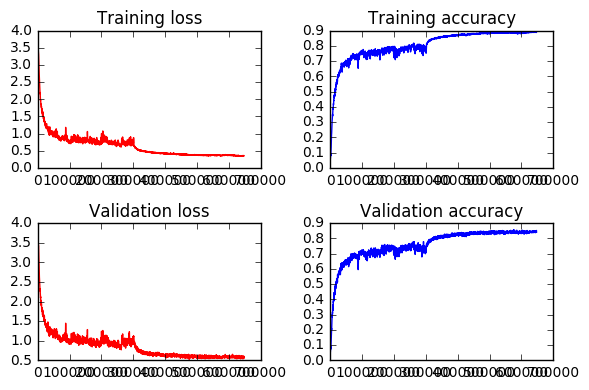

In [45]:
print('Plotting training and validation loss and accuracy ...')
loadLogData()
f,axarr = plt.subplots(2,2)

axarr[0,0].set_title('Training loss')
axarr[0,0].plot(batches,train_loss,'r')

axarr[0,1].set_title('Training accuracy')
axarr[0,1].plot(batches,train_accuracy,'b')

axarr[1,0].set_title('Validation loss')
axarr[1,0].plot(batches,validate_loss,'r')
      
axarr[1,1].set_title('Validation accuracy')
axarr[1,1].plot(batches,validate_accuracy,'b')

plt.tight_layout()
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

### Test set loss and accuracy 

In [46]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    b_test_loss,b_test_accuracy,b_softmax = evaluate(feed_dict_test['x'],feed_dict_test['y'],sess,loss,accuracy,softmax)
    print('test loss:',b_test_loss)
    print('test accuracy:',b_test_accuracy)

test loss: 0.682265
test accuracy: 0.833017


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [47]:
#Img_label = {'1.jpg':17,'2.jpg':1,'3.jpg':11,
#'4.jpg':14,'5.jpg':18,'6.jpg':27,
#'7.jpg':33,'8.jpg':4,'9.jpg':37,
#'10.jpg':36}
#with open('ylabel_newImage.p', 'wb') as f:
#    pickle.dump(Img_label, f, pickle.HIGHEST_PROTOCOL)
with open('ylabel_newImage.p','rb') as f:
    Img_label = pickle.load(f)

In [48]:
Img_label

{'1.jpg': 17,
 '10.jpg': 36,
 '2.jpg': 1,
 '3.jpg': 11,
 '4.jpg': 14,
 '5.jpg': 18,
 '6.jpg': 27,
 '7.jpg': 33,
 '8.jpg': 4,
 '9.jpg': 37}

In [49]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
#unzip('newImage.zip')

In [50]:
def loadNewImages(directory='newImage'):
    onlyfiles = [f for f in listdir(directory) if isfile(join(directory, f))]
    X_NewImage = []
    y_label=[]
    for i in range(len(onlyfiles)): 
        image = cv2.imread(join(directory,onlyfiles[i]))
        #flip R and B color
        image = np.fliplr(image.reshape(-1,3)).reshape(image.shape)
        X_NewImage.append(image)       
        y_label.append(Img_label[onlyfiles[i]])
    return [X_NewImage,y_label]

In [41]:
X_NewImage,y_label = loadNewImages()

In [42]:
def dispImages(X_NewImage):
    print('These images are collected from Google')
    
    plt.figure(figsize=(1,1))
    f,axarr = plt.subplots(2,5)
    for i in range(len(X_NewImage)):
        idx = i%5
        idy = i//5
        axarr[idy,idx].imshow(X_NewImage[i])
        axarr[idy,idx].set_title(Map_IdName[y_label[i]]+'({})'.format(y_label[i]))
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.1+0.4*(5), top=0.1+0.5*((len(X_NewImage)-1)//5+1),
                            wspace=0.8, hspace=0.4)

Showing 10 Original NewImages ...
These images are collected from Google


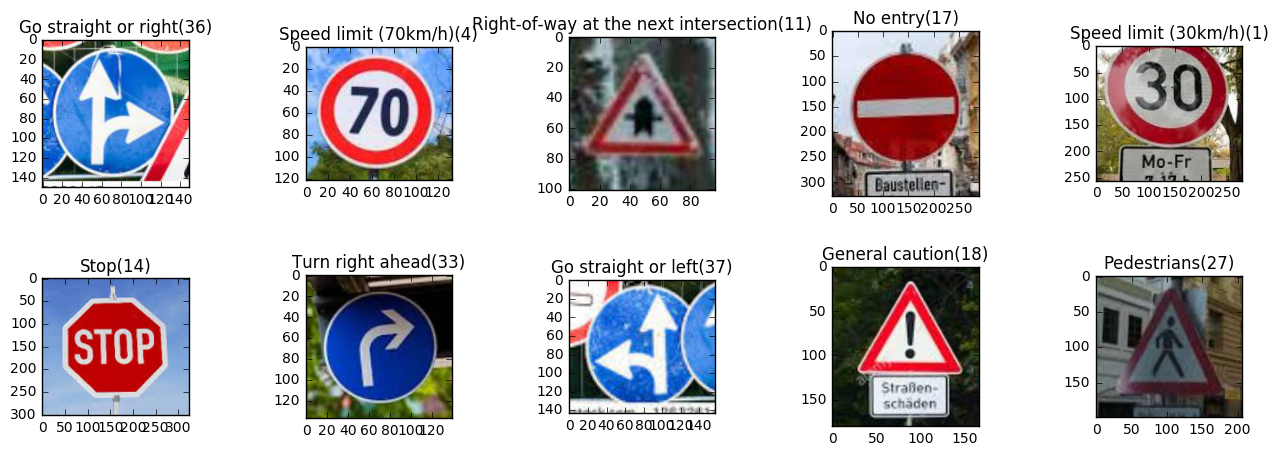

In [43]:
print('Showing 10 Original NewImages ...')
dispImages(X_NewImage)

### Preprocessing Images

Resize Images to 32*32*3
Showing 10 Resized NewImages
These images are collected from Google
Notice the difference of the axises


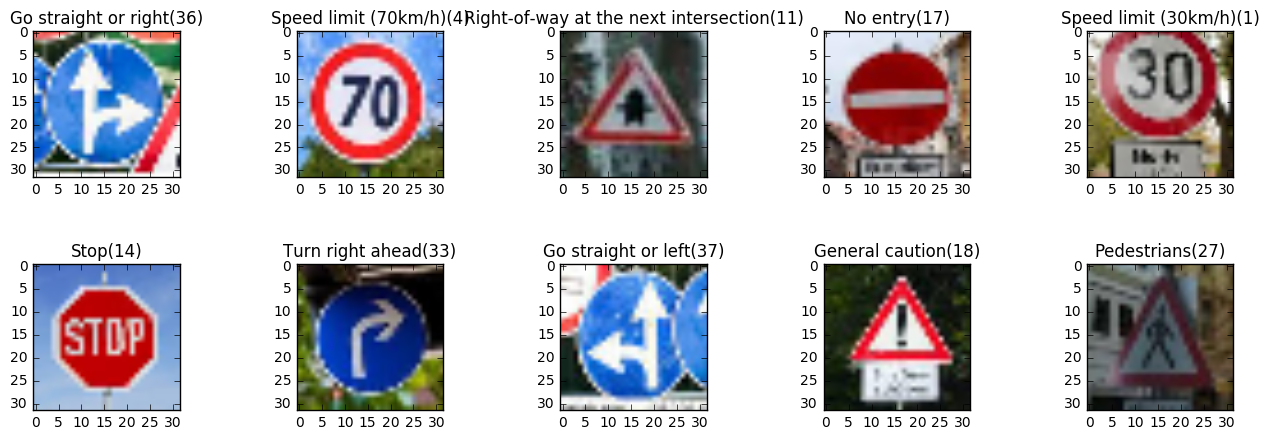

In [44]:
print('Resize Images to 32*32*3')
for i in range(len(X_NewImage)):
    X_NewImage[i] = cv2.resize(X_NewImage[i],(32,32),interpolation=cv2.INTER_CUBIC)
print('Showing 10 Resized NewImages')
dispImages(X_NewImage)
print('Notice the difference of the axises')

In [45]:
print('prepocessPipeLine ...')
X_NewImage_processed = preprocessPipeLine(X_NewImage)
print('Done')

prepocessPipeLine ...
Done


### Predict the Sign Type for Each Image

In [46]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    #saver.restore(sess,tf.train.latest_checkpoint('.'))
    saver.restore(sess,'./lenet')
    b_test_loss,b_test_accuracy,b_softmax = evaluate(X_NewImage_processed,y_label,sess,loss,accuracy,softmax)    
    pred = b_softmax.argsort(axis=1)
    pred_top5_labels=pred[:,-5:].tolist()
    pred_top1_label=pred[:,-1:].tolist()
    pred_softmax_prob=np.sort(b_softmax)[:,-1:-6:-1].tolist()
    print('new images test loss:',b_test_loss)
    print('new images test accuracy:',b_test_accuracy)

new images test loss: 1.57572
new images test accuracy: 0.6


### Analyze Performance

In [47]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
#print(pred_top1_label)
#print(pred_top5_labels)
def transLabelsToNames(labels,Map = Map_IdName):
    t = []    
    for i in range(len(labels)):
        d = labels[i]        
        if(type(d) is list):
            tt = []
            for j in range(len(d)):                
                lbs = d[j]                
                tt.append(Map[lbs])
            t.append(tt)
        else:
            lbs = Map[d]
            t.append(Map)                
    return t

In [48]:
pred_top1_label_names = transLabelsToNames(pred_top1_label)
pred_top5_label_names = transLabelsToNames(pred_top5_labels)
#print(pred_top1_label_names)
#print(pred_top5_label_names)

### Show all results

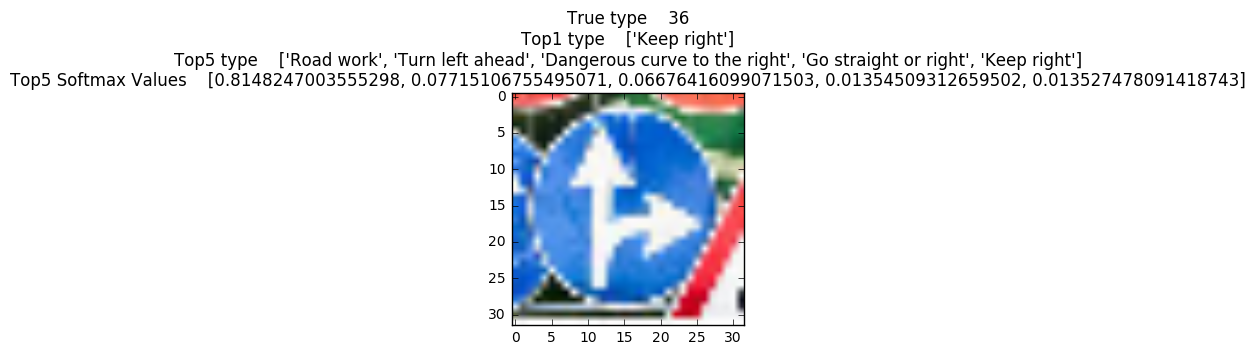

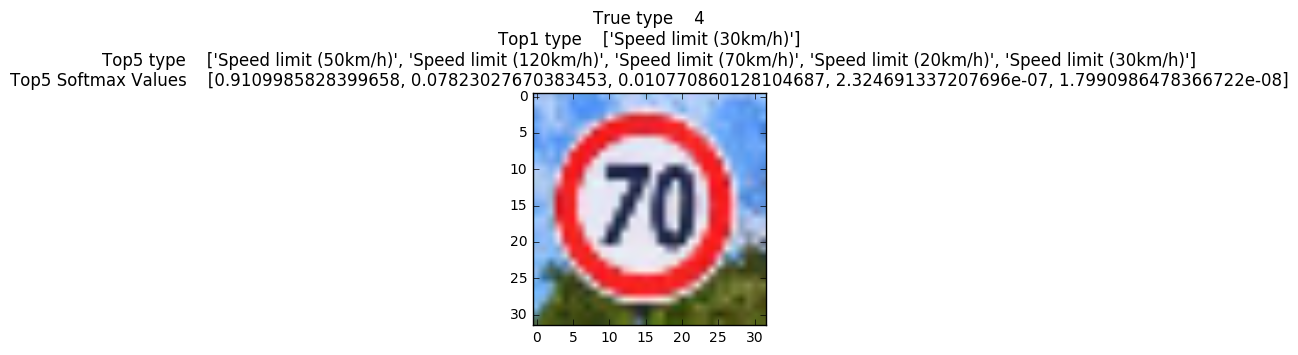

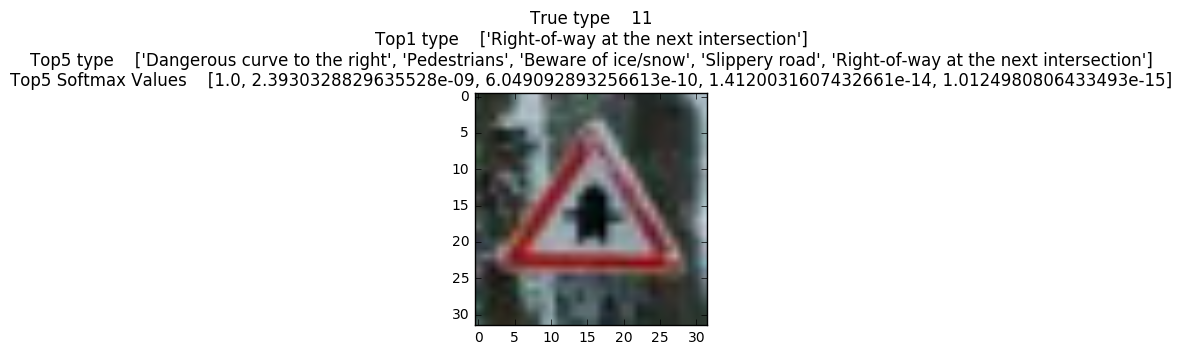

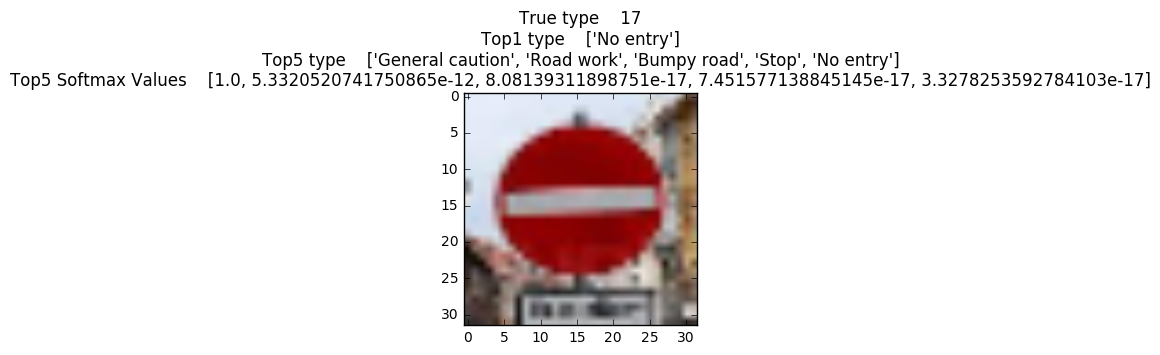

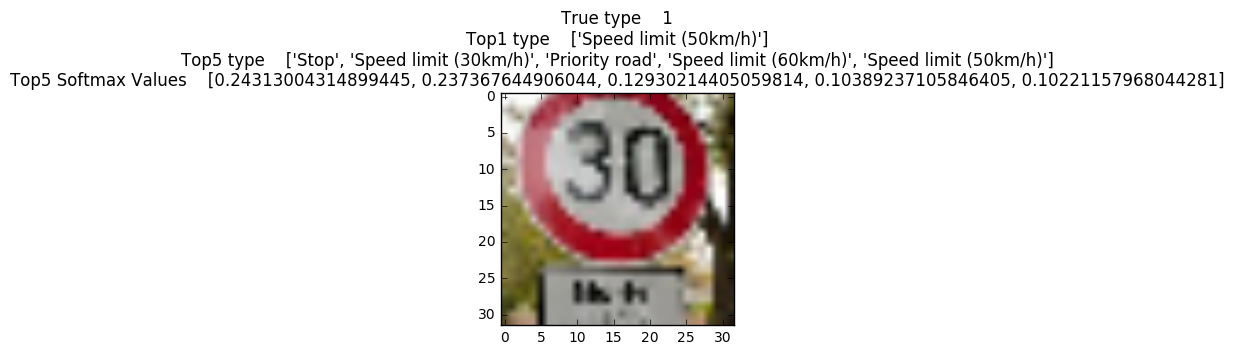

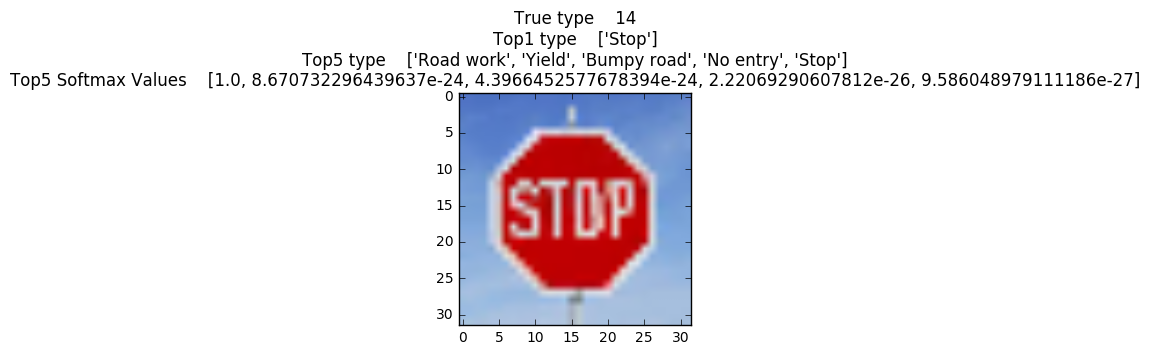

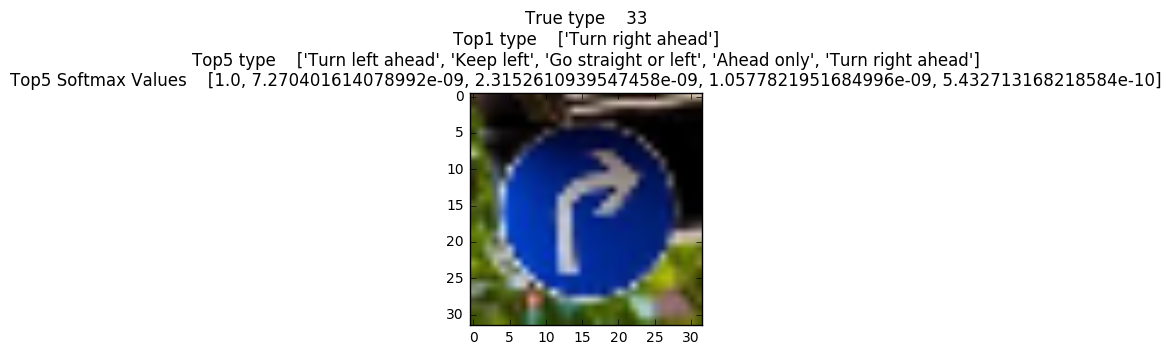

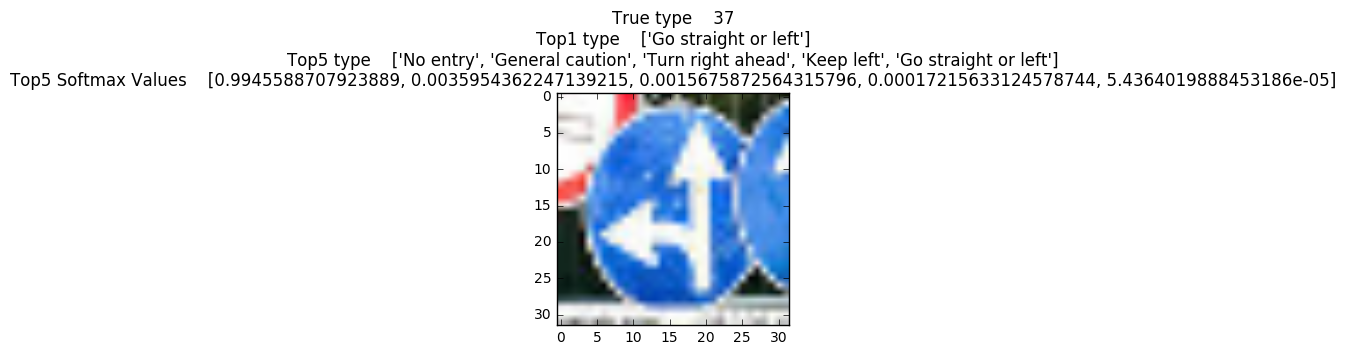

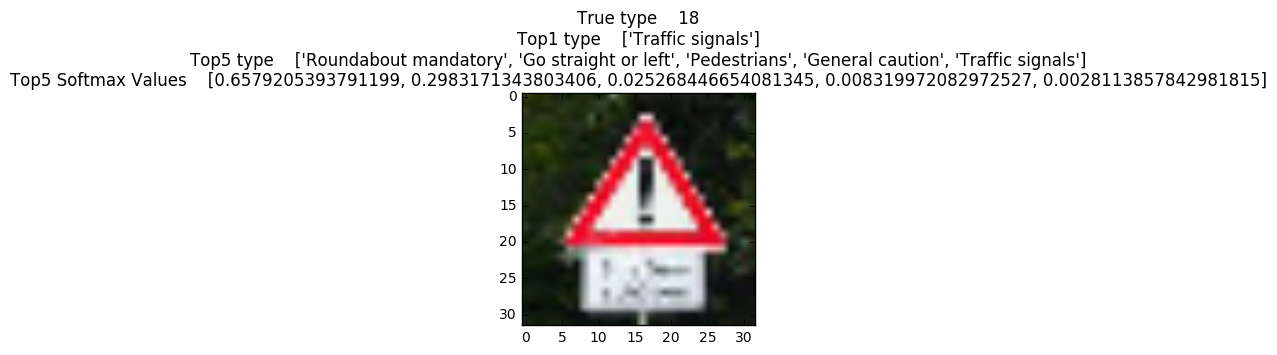

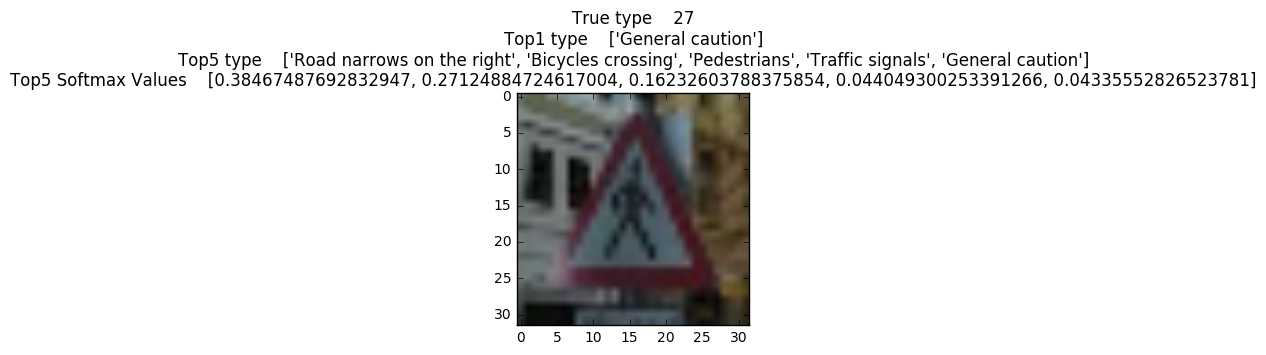

In [49]:
for i in range(len(X_NewImage)):
    plt.figure(figsize=(3,3))
    plt.imshow(X_NewImage[i])
#    print('True type',y_label[i])
#    print('Top1 type',pred_top1_label_names[i])
#    print('Top5 type',pred_top5_label_names[i])
#    print('Top5 Softmax Values',pred_softmax_prob[i])
    text = 'True type    '+str(y_label[i])+'\n'+\
    'Top1 type    '+str(pred_top1_label_names[i])+'\n'+\
    'Top5 type    '+str(pred_top5_label_names[i])+'\n'+\
    'Top5 Softmax Values    '+str(pred_softmax_prob[i])
    plt.title(text)

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

True type    36
Top1 type    ['Keep right']
Top5 type    ['Road work', 'Turn left ahead', 'Dangerous curve to the right', 'Go straight or right', 'Keep right']
Top5 Softmax Values    [0.8148247003555298, 0.07715106755495071, 0.06676416099071503, 0.01354509312659502, 0.013527478091418743]
True type    4
Top1 type    ['Speed limit (30km/h)']
Top5 type    ['Speed limit (50km/h)', 'Speed limit (120km/h)', 'Speed limit (70km/h)', 'Speed limit (20km/h)', 'Speed limit (30km/h)']
Top5 Softmax Values    [0.9109985828399658, 0.07823027670383453, 0.010770860128104687, 2.324691337207696e-07, 1.7990986478366722e-08]
True type    11
Top1 type    ['Right-of-way at the next intersection']
Top5 type    ['Dangerous curve to the right', 'Pedestrians', 'Beware of ice/snow', 'Slippery road', 'Right-of-way at the next intersection']
Top5 Softmax Values    [1.0, 2.3930328829635528e-09, 6.049092893256613e-10, 1.4120031607432661e-14, 1.0124980806433493e-15]
True type    17
Top1 type    ['No entry']
Top5 type  

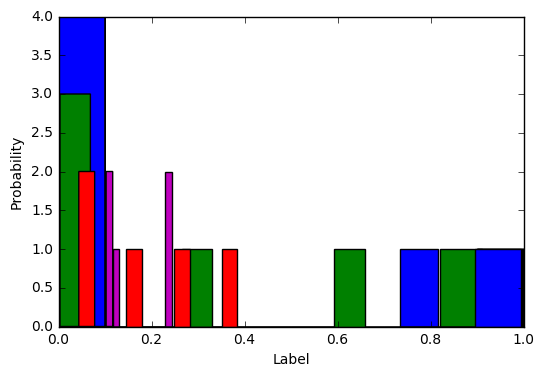

In [56]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
for i in range(len(X_NewImage)):
    text = 'True type    '+str(y_label[i])+'\n'+\
    'Top1 type    '+str(pred_top1_label_names[i])+'\n'+\
    'Top5 type    '+str(pred_top5_label_names[i])+'\n'+\
    'Top5 Softmax Values    '+str(pred_softmax_prob[i])
    print(text)
    fig = plt.figure(1)
    ax = fig.add_subplot(1, 1, 1)
    n, bins, patches = ax.hist(pred_softmax_prob[i])
    ax.set_xlabel('Label')
    ax.set_ylabel('Probability')

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 